In [55]:
%run tools.py

### PCA - GAARDIAN

In [17]:
df_sample_sets = pd.read_csv("../resources/manifest.tsv", sep="\t")
df_sample_sets

,sample_set,sample_count
0,1191-VO-MULTI-OLOUGHLIN-VMF00106,237
1,1191-VO-MULTI-OLOUGHLIN-VMF00140,1095
2,1244-VO-GH-YAWSON-VMF00149,485


#### Load data

In [18]:
sample_set = "1244-VO-GH-YAWSON-VMF00149"
chroms = ['2L', '2R', '3L', '3R', 'X']

In [19]:
spec = pd.read_csv("../resources/metadata/species_calls.csv")
spec

,sample_id,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii
0,VBS45187-5563STDY8782450,0.018,0.002,gamb_colu,gambiae
1,VBS45188-5563STDY8782451,0.968,0.002,gamb_colu,coluzzii
2,VBS45189-5563STDY8782452,0.959,0.002,gamb_colu,coluzzii
3,VBS45190-5563STDY8782453,0.978,0.002,gamb_colu,coluzzii
4,VBS45191-5563STDY8782454,0.968,0.003,gamb_colu,coluzzii
...,...,...,...,...,...
480,VBS45682-5563STDY9249611,0.966,0.002,gamb_colu,coluzzii
481,VBS45683-5563STDY9249612,0.965,0.002,gamb_colu,coluzzii
482,VBS45684-5563STDY9249613,0.975,0.002,gamb_colu,coluzzii
483,VBS45685-5563STDY9249614,0.974,0.002,gamb_colu,coluzzii


In [20]:
snps = {}
pos = {}

for chrom in chroms:
    
    snps[chrom], pos[chrom], metadata = load_arrays_and_metadata("../resources", sample_set, chrom)
    
metadata['location'] = metadata['location'].str.split(".").str.get(0)

In [21]:
metadata.head(2)

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,species_gambiae_coluzzii
0,VBS45187-5563STDY8782450,WA-2001,Alexander Egyir-Yawson,Ghana,Adumanu,2018,3,6.304,-1.681,F,gambiae
1,VBS45188-5563STDY8782451,WA-2002,Alexander Egyir-Yawson,Ghana,Adumanu,2018,10,6.302,-1.682,F,coluzzii


In [20]:
# choose colours for species
species_palette = px.colors.qualitative.Plotly
species_color_map = {
    'gambiae': species_palette[0],
    'coluzzii': species_palette[1],
    'arabiensis': species_palette[2],
    'intermediate_gambiae_coluzzii': species_palette[3],
    'intermediate_arabiensis_gambiae': species_palette[4],
}

In [7]:
#data = pd.read_csv("../results/PCA/75ff68583fc7404d5c5a604c81a4fe9a-data.csv")
#evr = np.load("../results/PCA/75ff68583fc7404d5c5a604c81a4fe9a-evr.npy")

running analysis: 75ff68583fc7404d5c5a604c81a4fe9a
setting up inputs
locating segregating sites within desired frequency range
preparing PCA input data
running PCA
saved results: 75ff68583fc7404d5c5a604c81a4fe9a
running analysis: 56e90b62bd88813e981064c7cbccdb76
setting up inputs
locating segregating sites within desired frequency range
preparing PCA input data
running PCA
saved results: 56e90b62bd88813e981064c7cbccdb76
running analysis: 23a5e26a7f689e8bec090cefa1c902f2
setting up inputs
locating segregating sites within desired frequency range
preparing PCA input data
running PCA
saved results: 23a5e26a7f689e8bec090cefa1c902f2
running analysis: 78593ba263e1319e8b1cc36b26147462
setting up inputs
locating segregating sites within desired frequency range
preparing PCA input data
running PCA
saved results: 78593ba263e1319e8b1cc36b26147462
running analysis: ca1d5111136cf1b7d15b6dbc31b16e74
setting up inputs
locating segregating sites within desired frequency range
preparing PCA input data


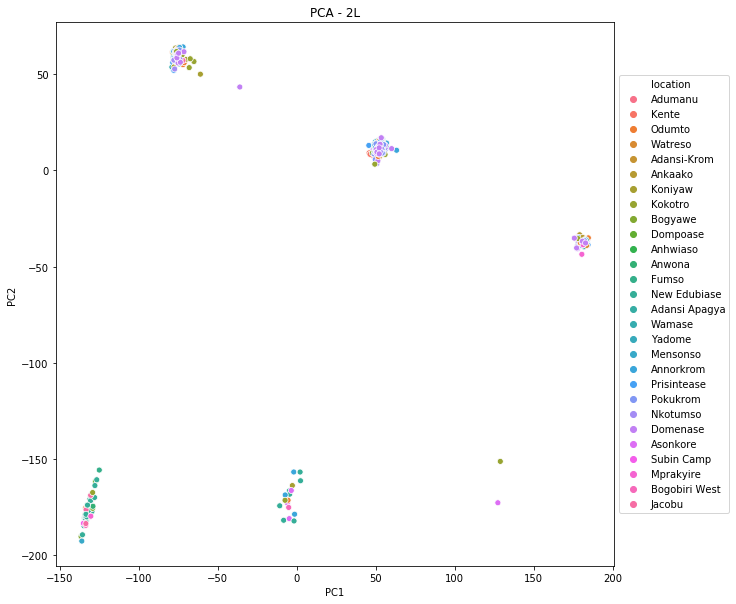

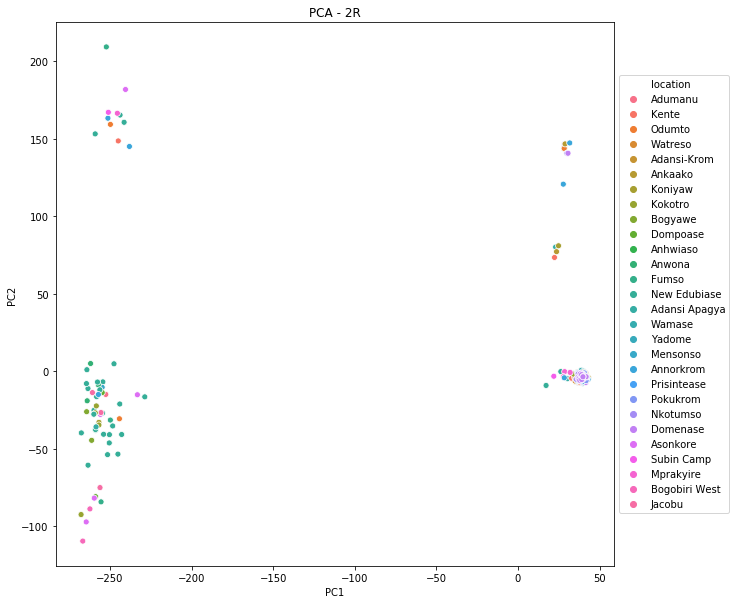

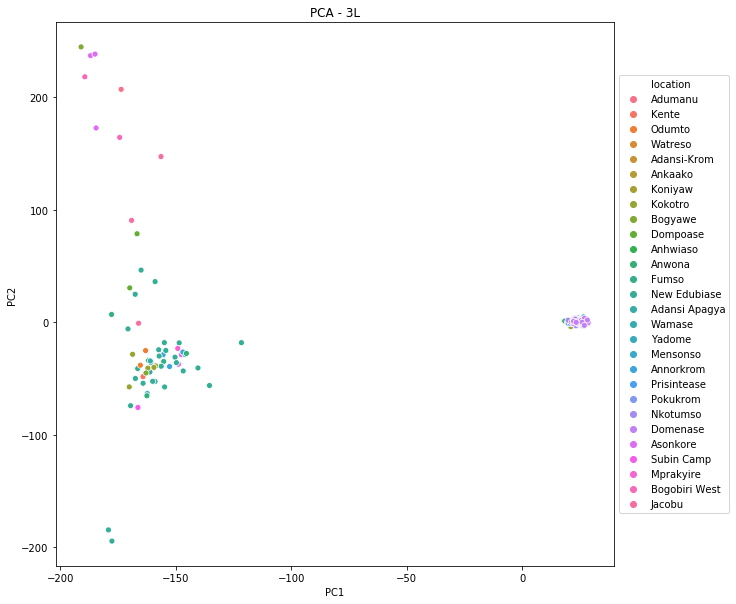

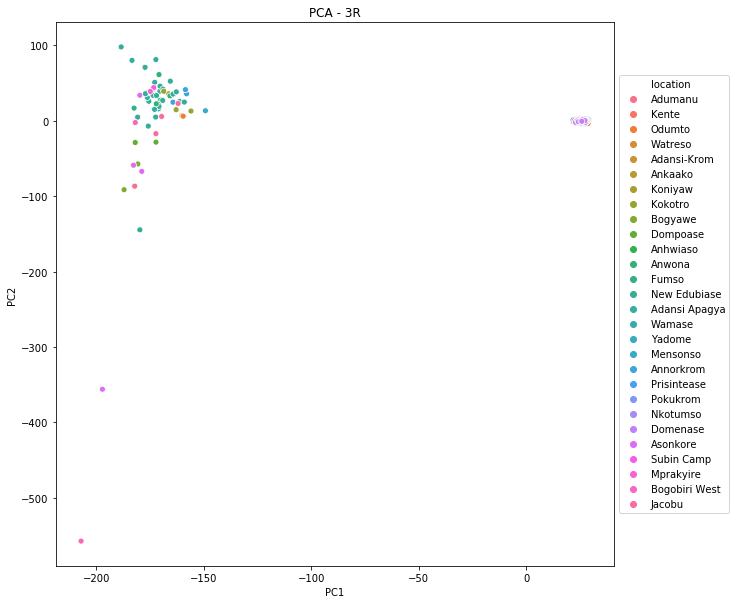

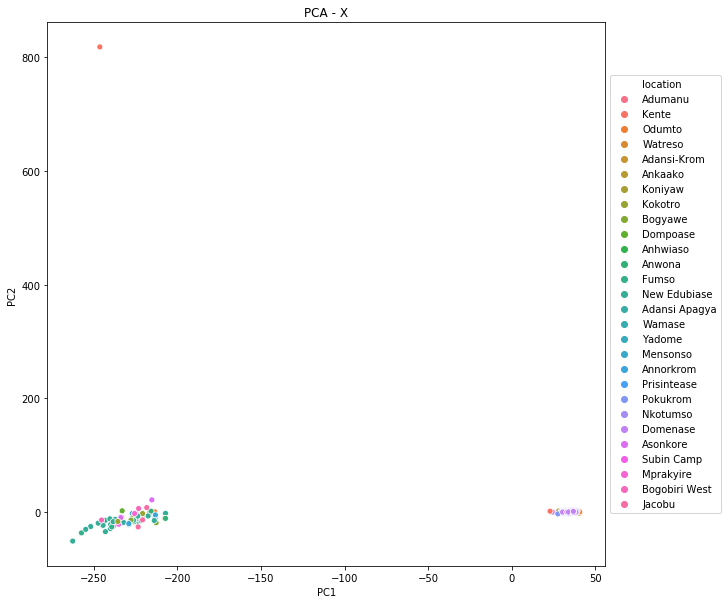

In [21]:
results_dir = "../results/PCA"


for chrom in chroms:
    data, evr = run_pca(contig=chrom, gt=snps[chrom], pos=pos[chrom], df_samples=metadata,
        sample_sets='1244-VO-GH-YAWSON-VMF00149', results_dir=results_dir
    )

    fig = plt.figure(figsize=(10, 10))
    fig = sns.scatterplot('PC1','PC2', data=data, hue='location')
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f"PCA - {chrom}")
    plt.savefig(f"../results/PCA/{chrom}.png")

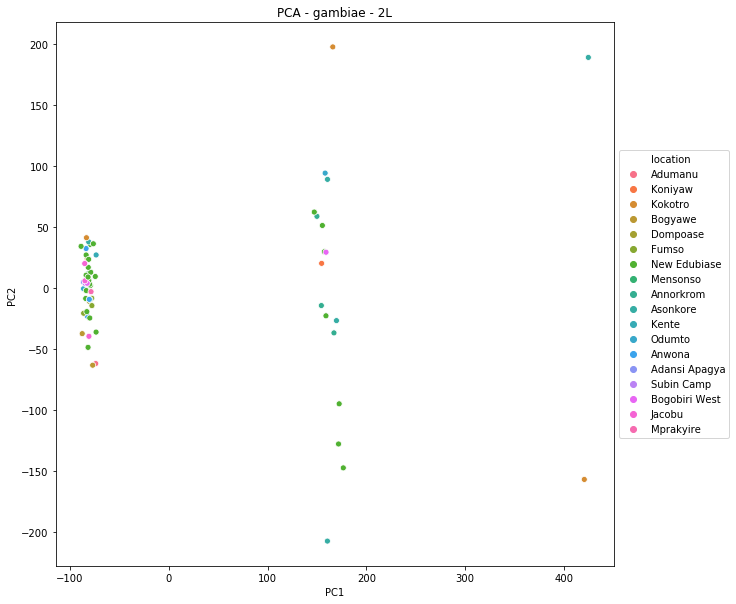

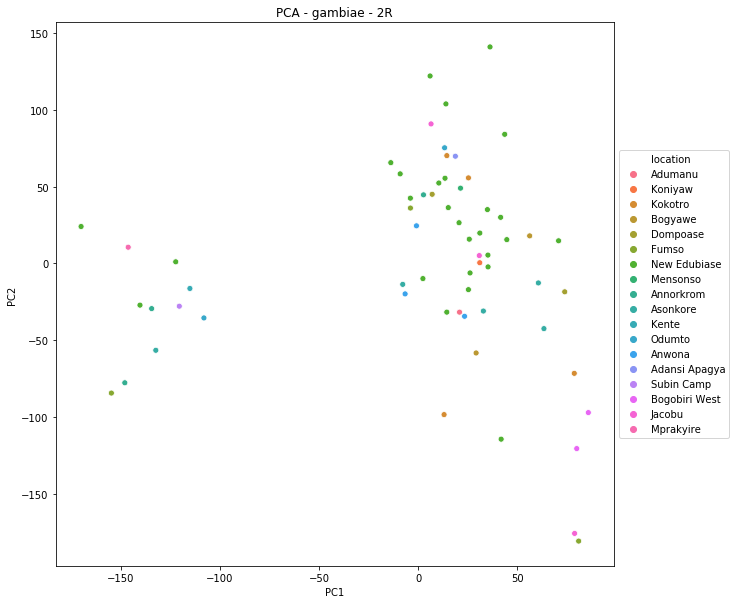

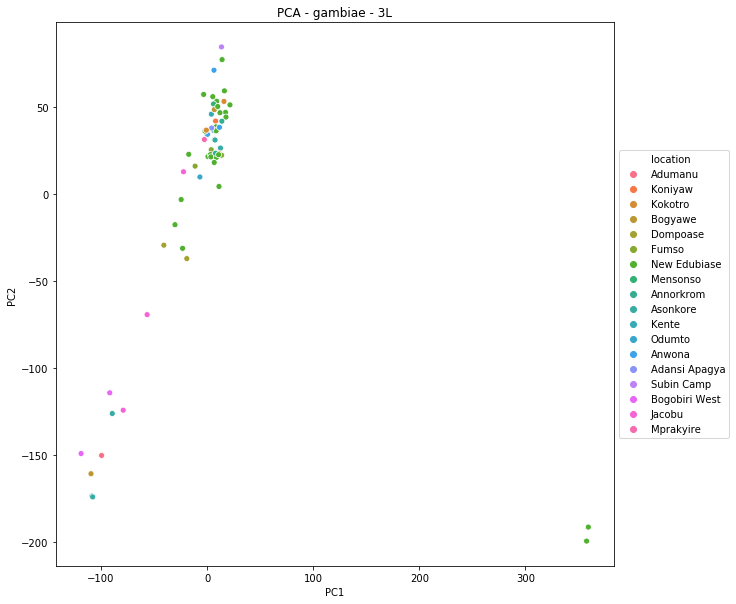

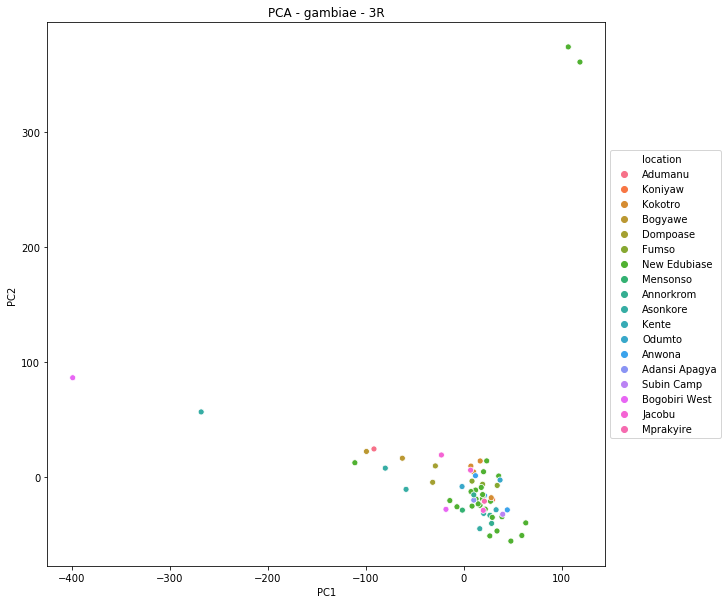

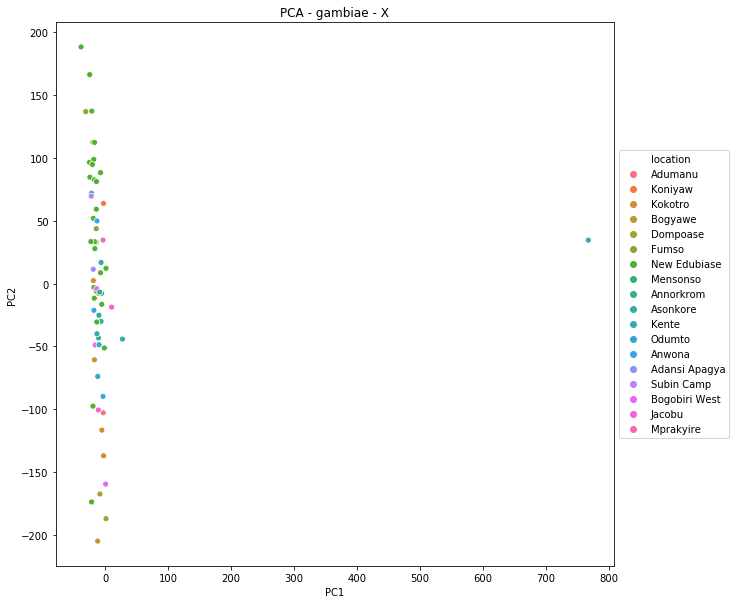

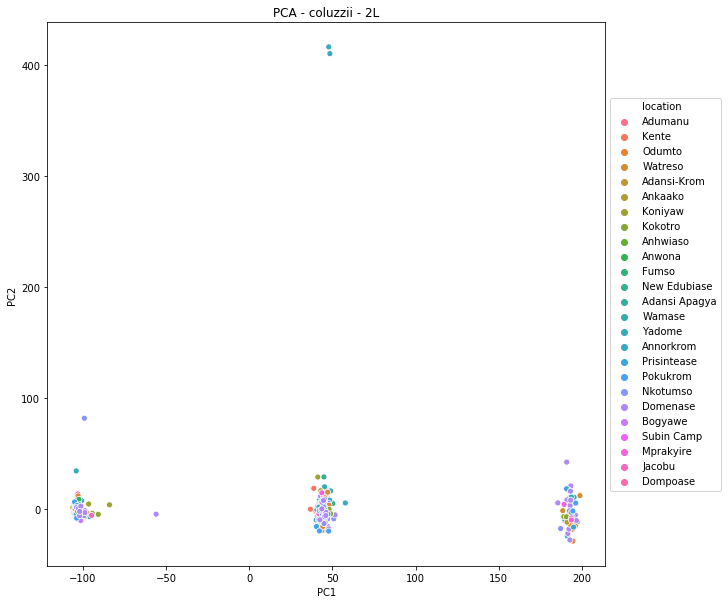

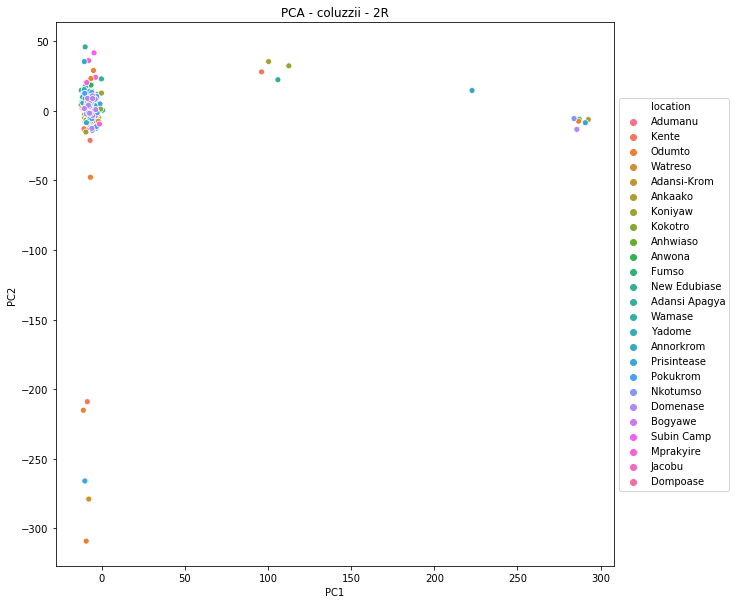

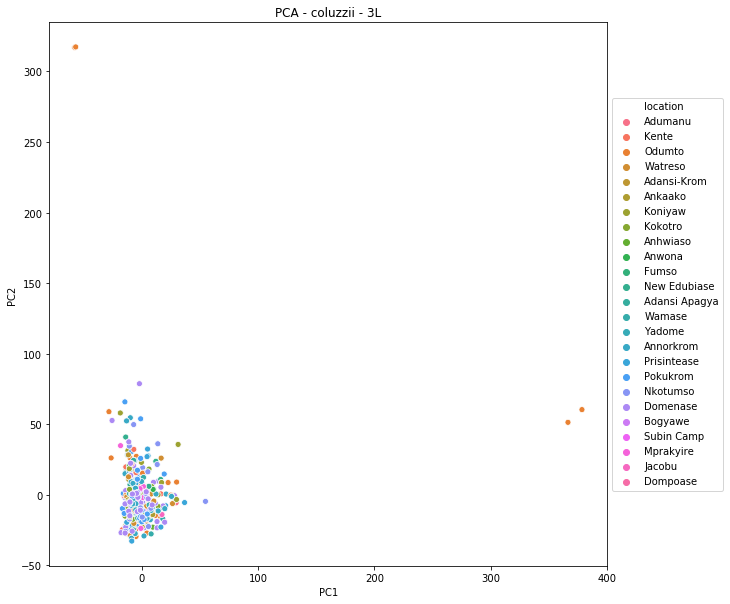

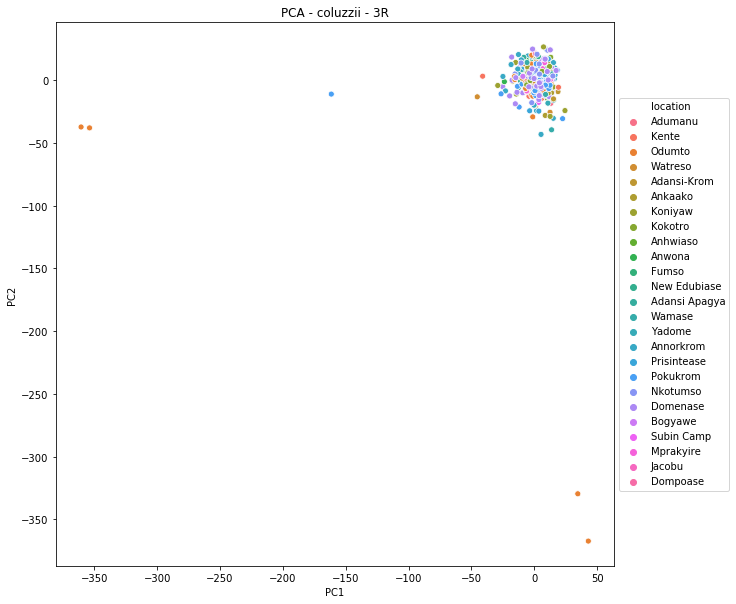

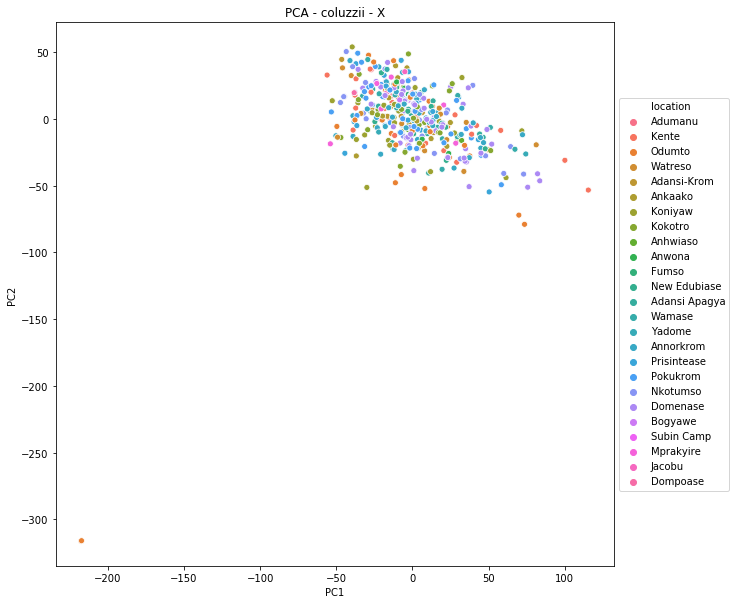

In [46]:
data= {}


for sp in metadata.species_gambiae_coluzzii.unique():
    
    sp_bool = metadata.species_gambiae_coluzzii == sp
    nmeta = metadata[sp_bool]

    for chrom in chroms:

        geno = snps[chrom].compress(sp_bool, axis=1)

        data[f'{sp}_{chrom}'], evr = run_pca(contig=chrom, gt=geno, pos=pos[chrom], df_samples=nmeta,
            sample_sets=f'1244-VO-GH-YAWSON-VMF00149 - {sp}', results_dir=results_dir
        )

        fig = plt.figure(figsize=(10, 10))
        fig = sns.scatterplot('PC1','PC2', data=data[f'{sp}_{chrom}'], hue='location')
        fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title(f"PCA - {sp} - {chrom}")
        plt.savefig(f"../results/PCA/{chrom}_{sp}.png")
        plt.show()

Removing samples...

In [47]:
coluzzii_exclude = data['coluzzii_3L'][np.logical_or((data['coluzzii_3L'].PC1 > 200),
              (data['coluzzii_3L'].PC2 > 200))].partner_sample_id.to_list()
coluzzii_exclude

['WA-2009', 'WA-2014', 'WA-2361', 'WA-2363']

In [48]:
gambiae_exclude = data['gambiae_3L'][data['coluzzii_3L'].PC1 > 200].partner_sample_id.to_list()
gambiae_exclude

/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


['WA-2053', 'WA-2062']

running analysis: 6d6d977654ae160e284d6840b856a20f
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: 6d6d977654ae160e284d6840b856a20f


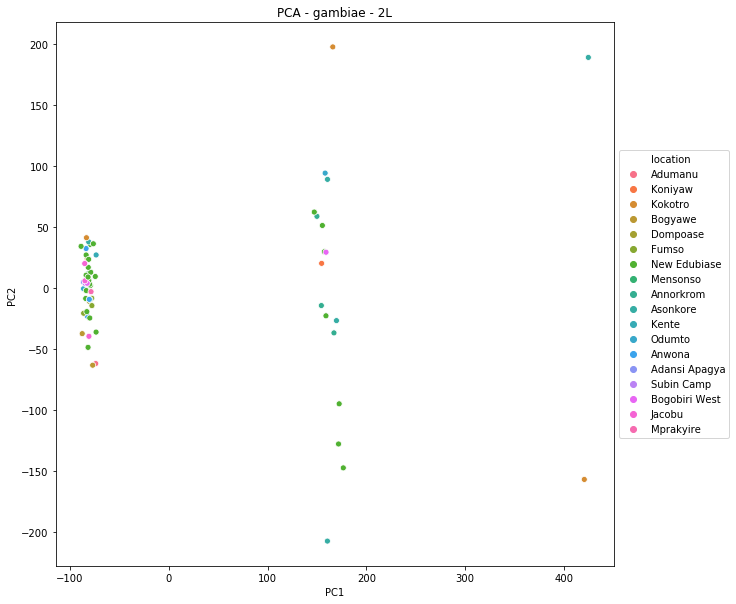

running analysis: 848822bfa67ca3ca81602389f95674b3
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: 848822bfa67ca3ca81602389f95674b3


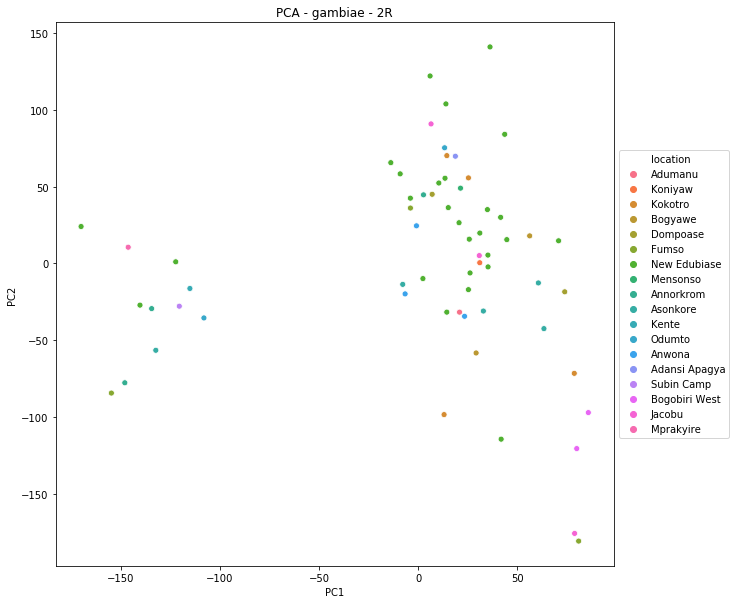

running analysis: da09507a5fa5fee2f6f8b56d3086b7da
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: da09507a5fa5fee2f6f8b56d3086b7da


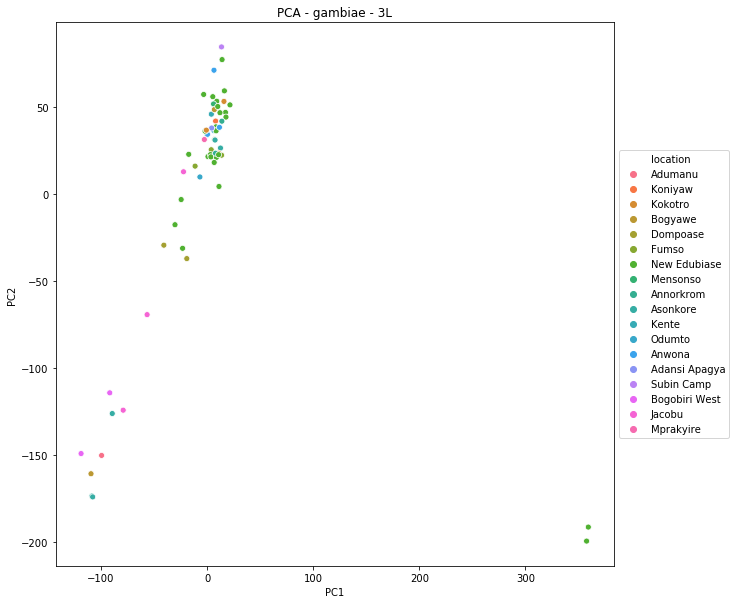

running analysis: d891aa017c57a99f2dea916a56825a7f
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: d891aa017c57a99f2dea916a56825a7f


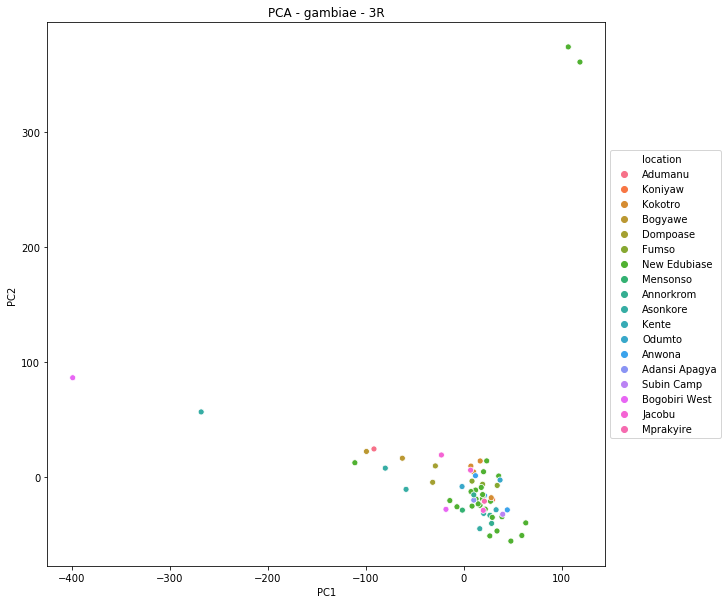

running analysis: 8fc7d8387e1c288a81f64aa50887d639
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: 8fc7d8387e1c288a81f64aa50887d639


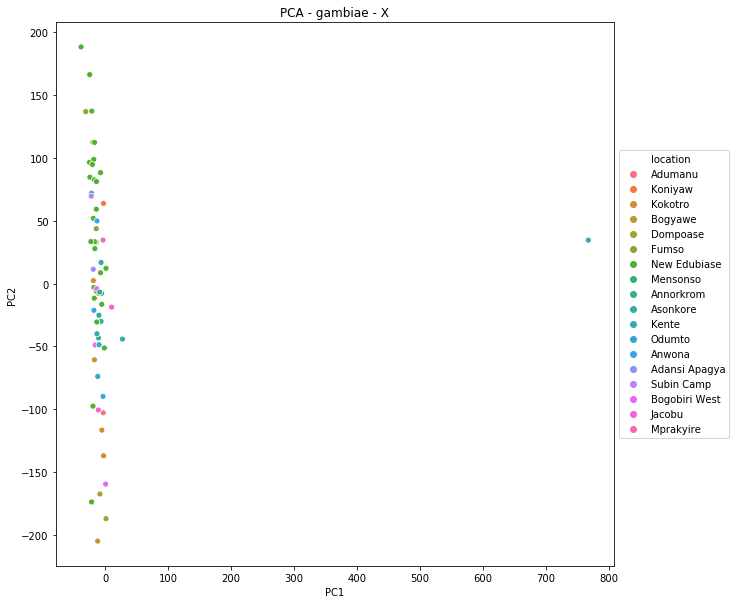

running analysis: cc930eb359e4b4beadc1de8058912a50
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: cc930eb359e4b4beadc1de8058912a50


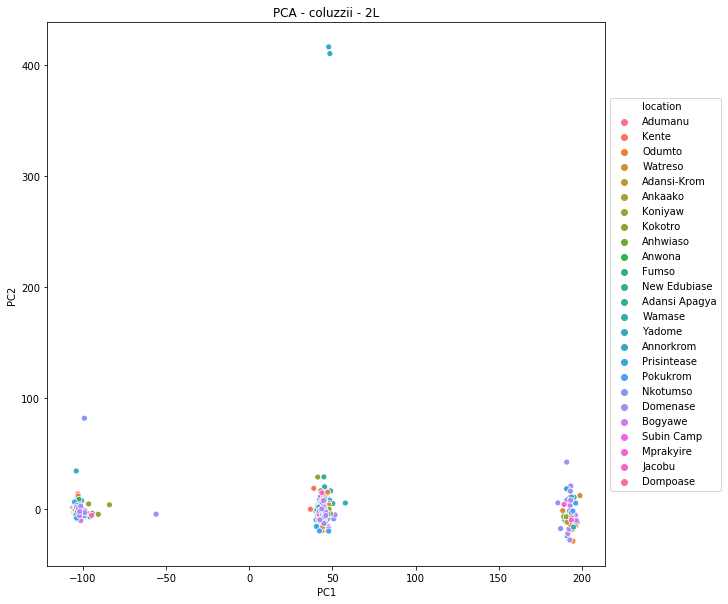

running analysis: 5c8408eb428dae44f28d62ac2e1443aa
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: 5c8408eb428dae44f28d62ac2e1443aa


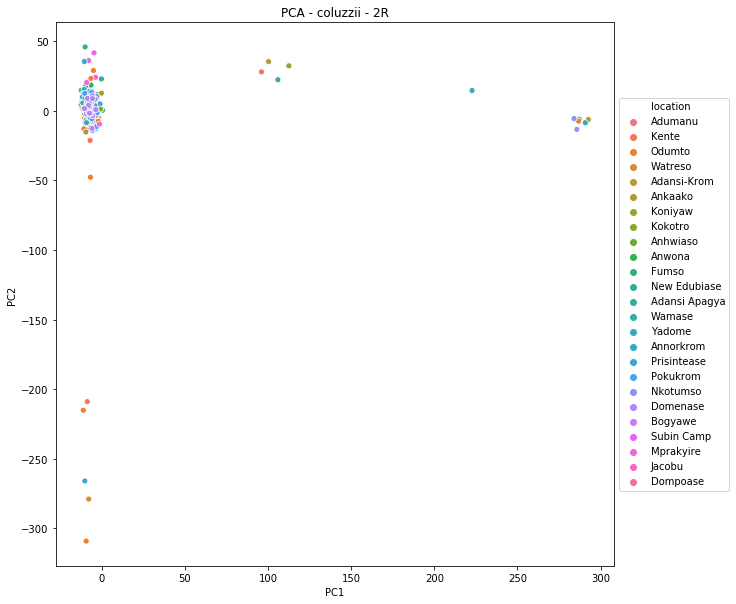

running analysis: f6167f18e81ad94c3217c5cf9bed17db
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: f6167f18e81ad94c3217c5cf9bed17db


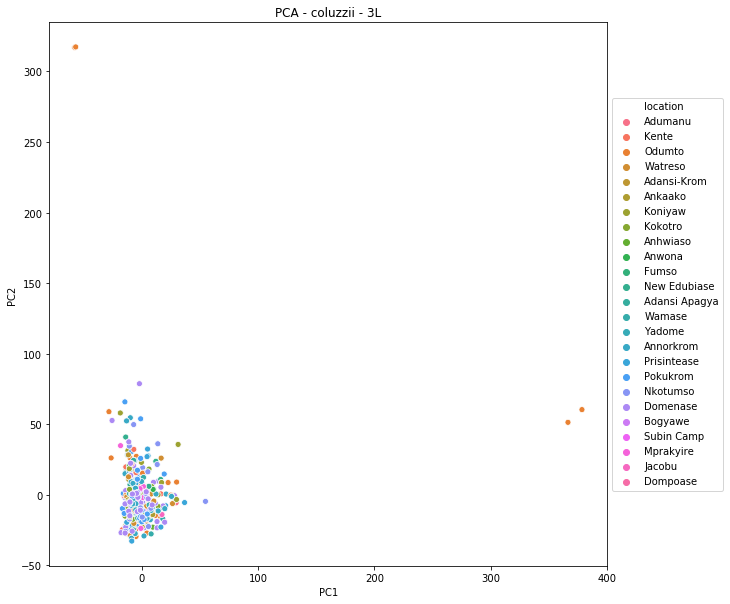

running analysis: 039c53002dc52aaa9c9376616cc67ec0
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: 039c53002dc52aaa9c9376616cc67ec0


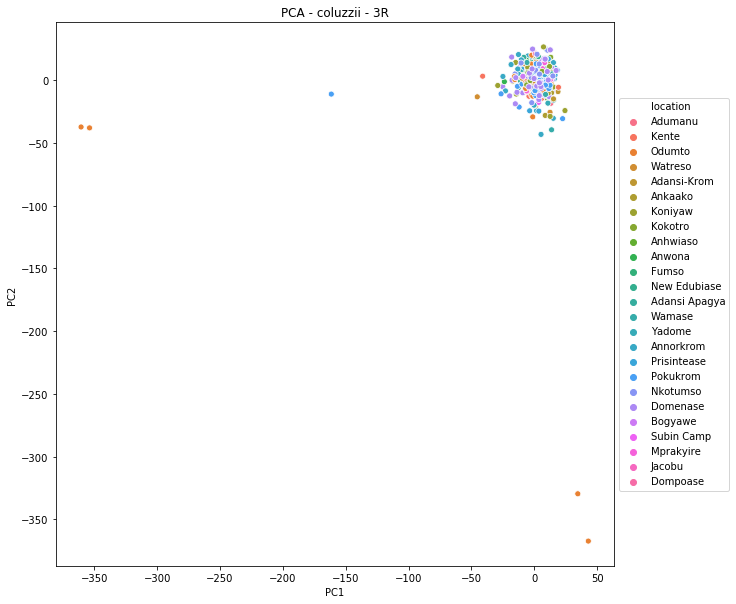

running analysis: 898fcd62a9fb7bc7ee36f650bef4bb0e
setting up inputs
locating segregating sites within desired frequency range


/home/sanj/apps/anaconda3/envs/pysanj/lib/python3.7/site-packages/dask/array/core.py:2756: UserWarning: Passing an object to dask.array.from_array which is already a Dask collection. This can lead to unexpected behavior.
  "Passing an object to dask.array.from_array which is already a "


preparing PCA input data
running PCA
saved results: 898fcd62a9fb7bc7ee36f650bef4bb0e


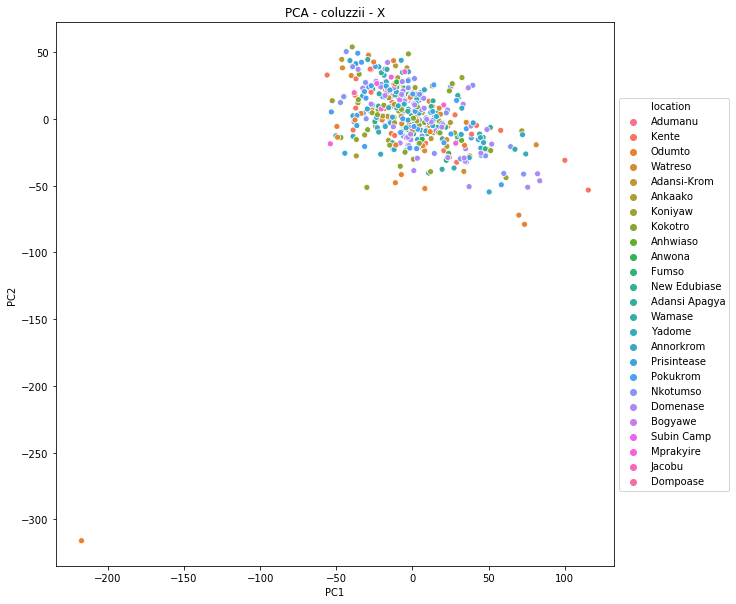

In [56]:
datadict= {}
results_dir = "../results/PCA"

for sp in metadata.species_gambiae_coluzzii.unique():
    
    sp_bool = metadata.species_gambiae_coluzzii == sp
    nmeta = metadata[sp_bool]

    for chrom in chroms:

        geno = snps[chrom].compress(sp_bool, axis=1)
        
        if sp == 'gambiae':

            datadict[f'{sp}_{chrom}'], evr = run_pca(contig=chrom, 
                                                 gt=geno, 
                                                 pos=pos[chrom], 
                                                 df_samples=nmeta, 
                                                 sample_query="partner_sample_id not in '@gambiae_exclude'",
                                                 sample_sets=f'1244-VO-GH-YAWSON-VMF00149 - {sp}', 
                                                 results_dir=results_dir
            )
        else:
            datadict[f'{sp}_{chrom}'], evr = run_pca(contig=chrom, 
                                     gt=geno, 
                                     pos=pos[chrom], 
                                     df_samples=nmeta, 
                                     sample_query="partner_sample_id not in '@coluzzii_exclude'",
                                     sample_sets=f'1244-VO-GH-YAWSON-VMF00149 - {sp}', 
                                     results_dir=results_dir
            )


        fig = plt.figure(figsize=(10, 10))
        fig = sns.scatterplot('PC1','PC2', data=datadict[f'{sp}_{chrom}'], hue='location')
        fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title(f"PCA - {sp} - {chrom}")
        plt.savefig(f"../results/PCA/{chrom}_{sp}_removedSamples.png")
        plt.show()

In [62]:
datadict[f'gambiae_X'][datadict[f'gambiae_X']['sex_call'] == 'M']

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
152,VBS45342-5563STDY8794282,WA-2156,Alexander Egyir-Yawson,Ghana,Kente,2018,11,6.299,-1.801,M,...,766.781616,34.594257,-15.75439,-8.018906,-12.652535,-2.124043,-9.090424,-6.388034,1.57989,-18.649912


In [60]:
metadata.sex_call.value_counts()

F    484
M      1
Name: sex_call, dtype: int64

In [65]:
datadict[f'coluzzii_X'][datadict['coluzzii_X'].PC1 < -150]

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
351,VBS45547-5563STDY9249472,WA-2361,Alexander Egyir-Yawson,Ghana,Odumto,2018,12,6.254,-1.841,F,...,-217.575943,-316.309052,-48.018177,-111.104469,-13.165027,16.332613,109.510544,-13.954788,-12.744279,10.687699
353,VBS45549-5563STDY9249474,WA-2363,Alexander Egyir-Yawson,Ghana,Odumto,2018,11,6.255,-1.841,F,...,-217.283401,-316.022125,-48.207325,-111.119766,-13.098602,16.322144,109.325493,-14.205981,-12.711390,10.668436
